In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as la
import time

start = time.time()
 #################################### 3 ######################################
# initialization
kk = 1
h = 0.08/2**kk
Nx = int(4/h)
Ny = Nx
hx = h
hy = h
ht = 0.0015/4**kk #time steps
Nt = int(0.15/ht) #steps of time

#create Dx and Dy
Dx = 1/hx*sp.diags([1, -1], [0, -1], shape=(Nx, Nx-1)).toarray()
Dy = 1/hy*sp.diags([1, -1], [0, -1], shape=(Ny, Ny-1)).toarray()

#calculate Axx Ayy
Lxx =Dx.transpose().dot(Dx)
Lyy =Dy.transpose().dot(Dy)

#create Lxx and Lyy
Ix = sp.eye(Nx-1)
Iy = sp.eye(Ny-1)

#compute the sparse 2D Laplacian
A = sp.kron(Iy,Lxx)+sp.kron(Lyy,Ix)
# plt.spy(A)
# plt.show()
# plt.close()

#negative laplacian
A = -A
# print(A.shape)


#function computes ut0
def fnut0(x,y):
    alpha = -5
    ut0 = np.exp(alpha*(x-2)**2 + alpha*(y-2)**2)
    return ut0

# 2D array of time depend solution
u = np.zeros((Nt+1, int((Nx-1)*(Ny-1)),))

# initial condition
cnt = 0
for j in range(1,Ny):
    for i in range(1,Nx):
        u[ 0,cnt ] = fnut0( i*h , j*h )
        cnt+=1

# ============================== FE ========================================
# loop over lexicographic order
cnt=0
for k in range(1,Nt+1):
    u[ cnt+1,: ] = u[ cnt,: ] + ht*A.dot(u[ cnt,: ])
    cnt+=1

#save the solution
uFE2D = np.copy(u)

# reshape the solution into 3D
uFE = np.copy(u.reshape(-1, Nx-1,Ny-1 ))

# find the stability upper bound
vals, vecs = la.eigsh(A, k=1, which = 'LM')
print('The upper bound by eigenvalue is :', abs(2/vals))
print('The upper bound direct derivation is: ', h**2/4 )

The upper bound by eigenvalue is : [0.0004001]
The upper bound direct derivation is:  0.0004


In [0]:
#=================================== BE ====================================


#initialization
LHS = sp.eye((Nx-1)*(Ny-1)) - ht*A

#convert into sparse matrix
LHS = sp.csr_matrix(LHS)

# loop over lexicographic order
cnt=0
for k in range(1,Nt+1):
    u[ cnt+1,: ] = la.spsolve(LHS, u[cnt,:])
    cnt+=1

u = u.reshape(-1, Nx-1,Ny-1 )
# uBE = np.copy(u)
uBE = u

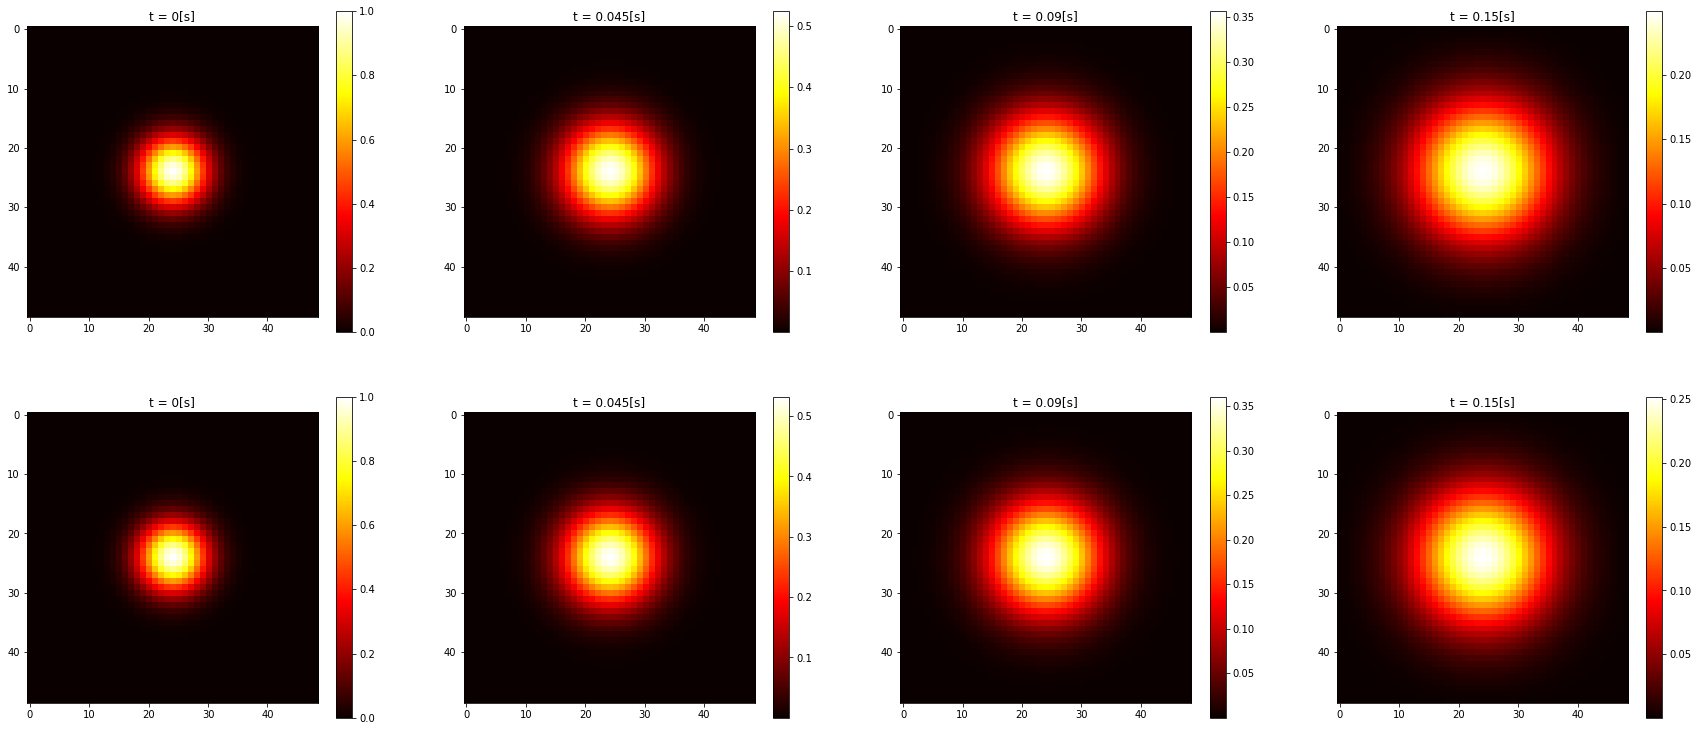

2.987765312194824


In [0]:
#============================== plot the results with color bar ==================
fig, axs = plt.subplots(2, 4,figsize=(30,13))

im1 = axs[0,0].imshow(uFE[0,:,:], cmap = 'hot')
fig.colorbar(im1, ax=axs[0, 0])
axs[0, 0].set_title("t = 0[s]")

im2 = axs[0,1].imshow(uFE[int(0.045/ht),:,:], cmap = 'hot')
fig.colorbar(im2, ax=axs[0, 1])
axs[0, 1].set_title("t = 0.045[s]")

im3 = axs[0,2].imshow(uFE[int(0.09/ht),:,:], cmap = 'hot')
fig.colorbar(im3, ax=axs[0, 2])
axs[0, 2].set_title("t = 0.09[s]")

im4 = axs[0,3].imshow(uFE[int(0.15/ht),:,:], cmap = 'hot')
fig.colorbar(im4, ax=axs[0, 3])
axs[0, 3].set_title("t = 0.15[s]")

im5 = axs[1,0].imshow(uBE[0,:,:], cmap = 'hot')
fig.colorbar(im5, ax=axs[1, 0])
axs[1, 0].set_title("t = 0[s]")

im6 = axs[1,1].imshow(uBE[int(0.045/ht),:,:], cmap = 'hot')
fig.colorbar(im6, ax=axs[1, 1])
axs[1, 1].set_title("t = 0.045[s]")

im7 = axs[1,2].imshow(uBE[int(0.09/ht),:,:], cmap = 'hot')
fig.colorbar(im7, ax=axs[1, 2])
axs[1, 2].set_title("t = 0.09[s]")

im8 = axs[1,3].imshow(uBE[int(0.15/ht),:,:], cmap = 'hot')
fig.colorbar(im8, ax=axs[1, 3])
axs[1, 3].set_title("t = 0.15[s]")

plt.show()

end = time.time()
elapsed = end - start
print(elapsed)